In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import sys
import math
import matplotlib
import pandas as pd

In [4]:
data = pd.read_csv('Force_value.FINAL.csv')
n= 5000
x = data['Time']
y = data['Power']*1000
t = x [::n]
p = y [::n]

In [6]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
yhat = savgol_filter(p, 51, 4)

In [7]:
yhat

array([10.27435698, 10.26118556, 10.24582449, ...,  9.52856203,
        9.55111063,  9.57261717])

In [28]:
series_x = pd.Series(t, name='time')
series_y = pd.Series(yhat, name='power')

In [53]:
series_y.round(2)

0       10.27
1       10.26
2       10.25
3       10.23
4       10.21
        ...  
5268     9.48
5269     9.51
5270     9.53
5271     9.55
5272     9.57
Name: power, Length: 5273, dtype: float64

In [58]:
a = series_x.to_frame()
b = series_y.round(2).to_frame()

In [59]:
a.reset_index(drop=True, inplace=True)

In [60]:
## save csv from pandas dataframe
foo = pd.concat([a,b], axis=1)

In [61]:
foo

,time,power
0,1,10.27
1,5001,10.26
2,10001,10.25
3,15001,10.23
4,20001,10.21
...,...,...
5268,26340001,9.48
5269,26345001,9.51
5270,26350001,9.53
5271,26355001,9.55


In [41]:
foo.to_csv('final_data_time_power.csv', index=False, sep=' ')

In [42]:
dff = pd.read_csv('final_data_time_power.csv')

In [43]:
dff

,time power
0,1 10.274356978547832
1,5001 10.261185557027927
2,10001 10.245824485690335
3,15001 10.228804325831243
4,20001 10.210621484538802
...,...
5268,26340001 9.481355650123676
5269,26345001 9.505228425504367
5270,26350001 9.52856202968553
5271,26355001 9.551110633570978


# Create graph seq

In [44]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import sys
import math
import matplotlib

In [45]:
# file name of figure
fn_data1="final_data_time_power.csv"
fn_data2="final_data_time_power.csv"
#fn_fig1="d1_dih.png"

Graph_title=""
X_label="Time (ns)"
Y_label="Force (pN)"
FONTSIZE=30

In [46]:
def readda():
  x = np.genfromtxt(fn_data1, skip_header=0, usecols = [0])
  y = np.genfromtxt(fn_data2, skip_header=0, usecols = [1])
  xx=[]
  yy=[]
  for i in range(5272):
    xx.append(x[i]*0.0002)
    yy.append(y[i])
  return xx,yy

time: 0.0
time: 0.1
time: 0.2
time: 0.3
time: 0.4
time: 0.5
time: 0.6
time: 0.7
time: 0.8
time: 0.9
time: 1.0
time: 1.1
time: 1.2
time: 1.3
time: 1.4
time: 1.5
time: 1.6
time: 1.7
time: 1.8
time: 1.9
time: 2.0
time: 2.1
time: 2.2
time: 2.3
time: 2.4
time: 2.5
time: 2.6
time: 2.7
time: 2.8


KeyboardInterrupt: 

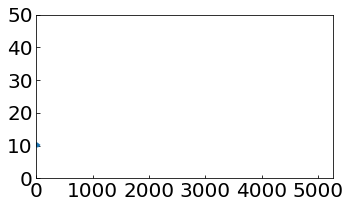

In [52]:
def plotfigure(text,ds,ag,time):
  figurefile=text
  ag=ag
  ds=ds
#  print(ag,ds)
  tmp=[[0.0,ds],[0.0,0.0],[ds,ds],[0.0,ag]]
  ax2.plot(ds,ag,linewidth=4)
  ax2.set_xlim(0,5272)
  ax2.set_xticks(np.arange(0, 5272, 1000))
  ax2.set_ylim(0,50.002)
  ax2.set_yticks(np.arange(0, 55, 10))
  ax2.set_xlabel('Frame',fontsize=20)
  ax2.set_ylabel('Power',fontsize=20)
  #ax2.set_title(time,{'color': 'b', 'fontsize': 20})
  ax2.tick_params(axis='both',which='major',direction='in',labelsize=20)
  plt.savefig(figurefile)
  plt.cla()   
xx,yy=readda()
#fig, ax = plt.subplots(figsize=(5, 8))
fig, (ax2) = plt.subplots(1, 1, figsize=(5.5,6.5), num=12592)
ax2.tick_params(axis='both',which='major',direction='in',labelsize=15)
plt.subplots_adjust(left=0.2, bottom=0.12, right=0.95, top=0.47, wspace=0.1)
#plt.subplots_adjust(bottom=0.2,left=0.17,right=0.95,top=0.9, wspace=0.1)
interval=1
for i in range(0,len(xx),interval):
  text="plot/syt_{}.png".format("%05d"%(i))
  time="time: {}".format(float(i)/10.0)
  print(time)
  plotfigure(text,xx[:i],yy[:i],time)